# Prova Intermediária - Machine Learning

**Nome do aluno**: Lucas Hix

Você deve submeter o trabalho via Blackboard. É de sua responsabilidade garantir que o arquivo correto foi enviado.

Se você precisou adicionar arquivos extras à essa prova, assegure-se de que você os está enviando também.

A prova é individual e com consulta - pode consultar suas anotações, a web, o que quiser, menos perguntar para outros ou para as AIs. Faça o seu trabalho de maneira ética!

ChatGPT para perguntas teóricas não é permitido. CoPilot para código é permitido.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans


---

**Question 1**

An important skill when studying, testing, and developing new Machine Learning models is the capacity to make test data to explore your understanding of the techniques. In this question you will write functions to make fake datasets to test linear regression.

Look at the example below:

In [2]:
def make_dataset() -> np.array:
    num_points = 100
    num_features = 2
    noise = 0.1

    # Make the features.
    X = np.random.randn(num_points, num_features)

    # Make the target.
    y_real = 1 + 2 * X[:, 0] + 3 * X[:, 1]

    # Add noise.
    y_observed = y_real + np.random.normal(0, noise, num_points)

    return X, y_observed

The functions above work by making a fake set of sample features, and computing a target value according to a linear model plus some noise. Here is an example of use:

In [3]:
X, y = make_dataset()

So, the data generation process above makes $y = 1 + 2 x_1 + 3 x_2 + \text{noise}$

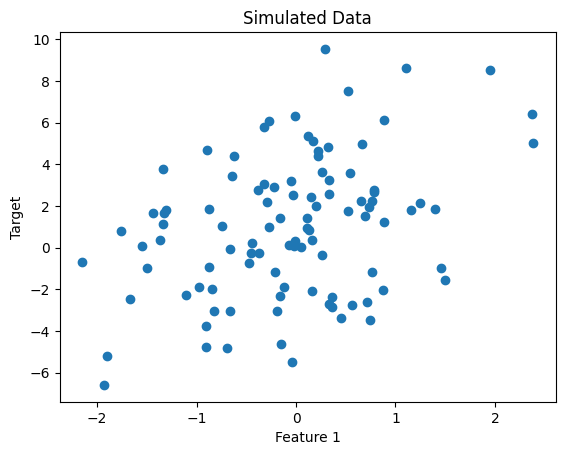

In [4]:
plt.scatter(X[:, 0], y)
plt.xlabel("Feature 1")
plt.ylabel("Target")
plt.title("Simulated Data")
plt.show()

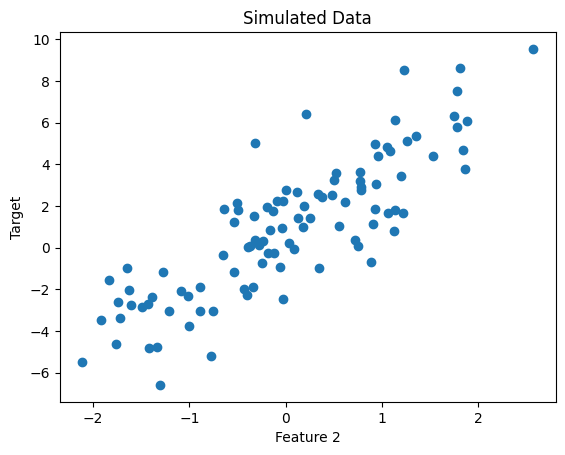

In [5]:
plt.scatter(X[:, 1], y)
plt.xlabel("Feature 2")
plt.ylabel("Target")
plt.title("Simulated Data")
plt.show()

Now, based on the preceding examples, answer the following questions:

(a) (1.0 pts) Split the generated data into train and test datasets. Fit a linear model to the training set and measure the RMSE in the test set.


---

**Answer**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

model = LinearRegression()
model.fit(X_train, y_train)

print(f'RMSE: {abs(1 - (np.sqrt(mean_squared_error(y_test, model.predict(X_test)))))}')

RMSE: 0.8862357764561896



---

(b) (1.0 pts) Make a new dataset as described:

- Features 1 and 2 are random values, with standard normal distribution. Hint: use `np.random.randn` as in the example
- Feature 3 is $x_3 = 2 x_1 + 3 x_2$
- Target is $y = 4 x_1 + 5 x_2 + 6 x_3$

You can use the `make_dataset` function above as inspiration, of course.


---

**Answer**

In [7]:
def genereate_dataset_feature3() -> np.array:
    num_points = 100
    num_features = 2
    noise = 0.1

    # Make the random features.
    X = np.random.randn(num_points, num_features)

    # Adiciona uma terceira feature que é uma combinação linear das duas primeiras.
    X = np.column_stack((X, 2 * X[:, 0] + 3 *X[:, 1]))

    # Make the target.
    y_real = 4 * X[:, 0] + 5 * X[:, 1] + 6 * X[:, 2]

    # Add noise.
    return X, y_real + np.random.normal(0, noise, num_points)

In [8]:
X, Y = genereate_dataset_feature3()

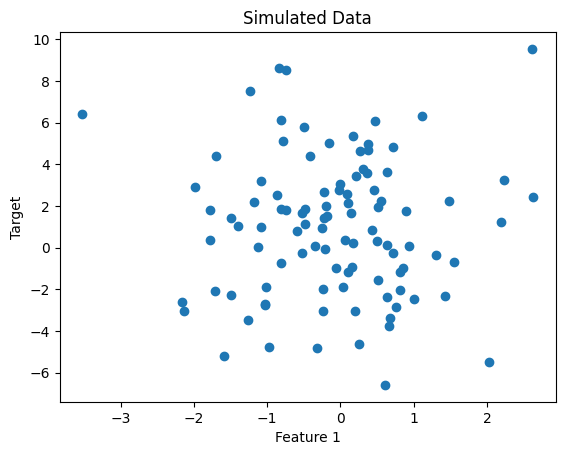

In [9]:
plt.scatter(X[:, 0], y)
plt.xlabel("Feature 1")
plt.ylabel("Target")
plt.title("Simulated Data")
plt.show()

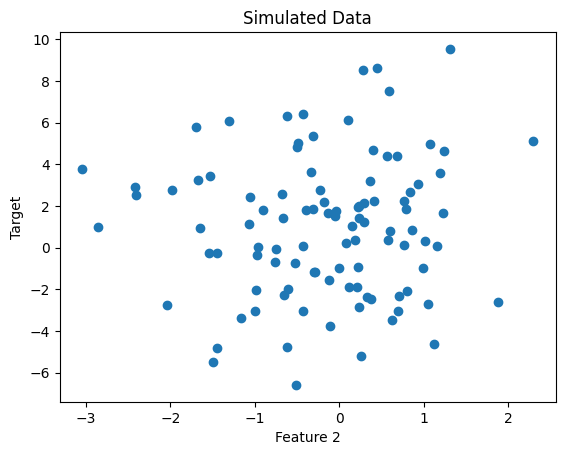

In [10]:
plt.scatter(X[:, 1], y)
plt.xlabel("Feature 2")
plt.ylabel("Target")
plt.title("Simulated Data")
plt.show()

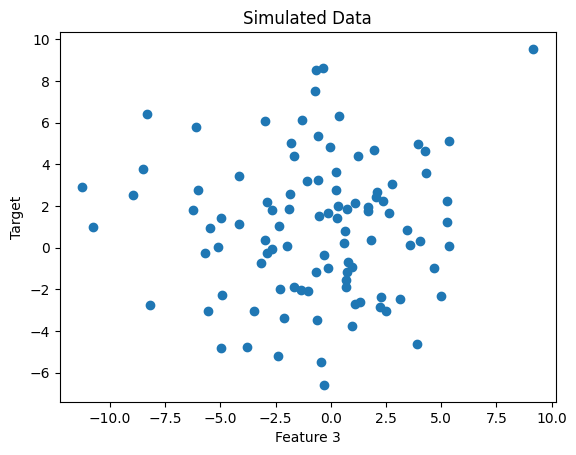

In [11]:
plt.scatter(X[:, 2], y)
plt.xlabel("Feature 3")
plt.ylabel("Target")
plt.title("Simulated Data")
plt.show()


---

(c) (1.0 pts) Test two Ridge models to the new dataset: one using $\alpha = 10^{-3}$ and another using $\alpha = 10^{5}$. Explain the difference between the parameters obtained (`model.intercept_`, `model.coefs_`)


---

**Answer**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

ridge_model_1 = Ridge(alpha=1e-3)
ridge_model_2 = Ridge(alpha=1e5)

ridge_model_1.fit(X_train, y_train)
ridge_model_2.fit(X_train, y_train)

intercept_1, coefs_1 = ridge_model_1.intercept_, ridge_model_1.coef_
intercept_2, coefs_2 = ridge_model_2.intercept_, ridge_model_2.coef_

print(f"O modelo Ridge com alpha=1e-3 tem coeficientes {coefs_1} e intercepto {intercept_1}")
print(f"O modelo Ridge com alpha=1e5  tem coeficientes {coefs_2} e intercepto {intercept_2}")

print(f'RMSE Ridge 1: {abs(1 - np.sqrt(mean_squared_error(y_test, ridge_model_1.predict(X_test))))}')
print(f'RMSE Ridge 2: {abs(1 - np.sqrt(mean_squared_error(y_test, ridge_model_2.predict(X_test))))}')

O modelo Ridge com alpha=1e-3 tem coeficientes [-0.16273678  0.11274464  0.01276038] e intercepto 1.0180262682038703
O modelo Ridge com alpha=1e5  tem coeficientes [-6.98812364e-05  7.78668166e-05  9.38379771e-05] e intercepto 1.0174522304960543
RMSE Ridge 1: 2.2495582498146645
RMSE Ridge 2: 2.2502242481005785


O modelo Ridge com $\alpha = 10^{5}$, devido ao seu valor grande de $\alpha$, realiza uma regularização extrema, levando em conta o ruído em vez de ignorá-lo na regularização, o que faz com que os "pesos" (coeficientes) de todas as features tendam a zero, resultando em um modelo que quase ignora os variáveis independentes de X. Por outro lado, o modelo Ridge com $\alpha = 10^{-3}$ acaba por fazer o oposto, aplicando uma regularização muito fraca o que tambem é ruim uma vez que o modelo se ajustou aos dados de treinamento mais não é capaz de se ajustar a novos dados, os dados de teste.


---

(d) (1.0 pts) Make a new dataset as described:

- Only one feature $x$, made of random values of standard normal distribution.
- But the target is $y = 1 + 2 x + 3 x^2$


---

**Answer**

In [13]:
def generate_dataset_d() -> np.array:
    num_points = 100
    num_features = 1
    noise = 0.1

    # Make the random features.
    X = np.random.randn(num_points, num_features)

    # Make the target.
    y_real = 1 + 2 * X[:, 0] + 3 * X[:, 0]**2

    # Add noise.
    return X, y_real + np.random.normal(0, noise, num_points)

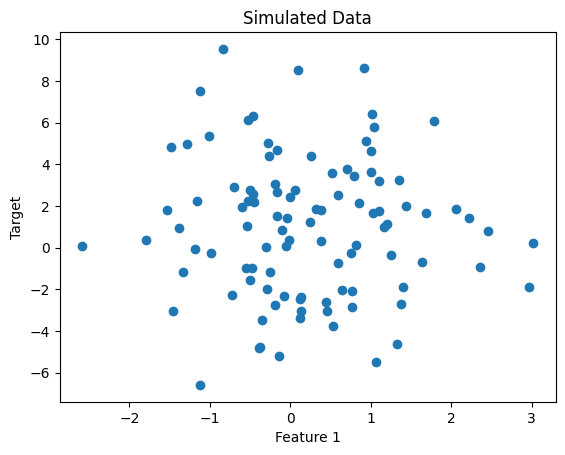

In [14]:
X, Y = generate_dataset_d()

plt.scatter(X[:, 0], y)
plt.xlabel("Feature 1")
plt.ylabel("Target")
plt.title("Simulated Data")
plt.show()


---

(e) (1.0 pts) Fit an adequate linear model to the dataset of item (d). 

Hint: you may need `sklearn.preprocessing.PolynomialFeatures`.

Hint 2: you may need a `sklearn.pipeline.Pipeline`: https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_pipeline_display.html#displaying-a-pipeline-chaining-multiple-preprocessing-steps-classifier

Hint 3: If using `PolynomialFeatures`, don't forget to use the argument `include_bias=False`


---

**Answer**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

pipeline = Pipeline([
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear_regression', LinearRegression())
])

pipeline.fit(X_train, y_train)

print(f'R^2 score: {1 - abs(pipeline.score(X_test, y_test))}')

R^2 score: 0.9739927367313963



---

**Question 2**

The following function simulates a dataset $X$ of customers versus products, and the value in $X_{i,j}$ means the number of items of product $j$ purchased by customer $i$. Ignore its internal workings.

In [16]:
def make_dataset():
    np.random.seed(42)

    num_customers = 1000
    num_purchases = 300

    pc = np.array([1, 1, 1, 1, 1])
    pc = np.exp(pc)
    pc = pc / np.sum(pc)

    p = np.array([
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1],
    ])
    p = np.exp(0.7*p)
    p = p / np.sum(p, axis=1)[:, np.newaxis]

    C = np.random.choice(len(pc), size=(num_customers, 1), p=pc)

    Pk = []
    
    for k in range(p.shape[0]):
        Pki = []
        for i in range(p.shape[1]):
            Pki.append(
                np.random.binomial(
                    n=num_purchases,
                    p=p[k, i],
                    size=(num_customers, 1),
                ))
        Pk.append(np.hstack(Pki))

    P = np.zeros((num_customers, p.shape[1]))
    for k in range(p.shape[0]):
        P += Pk[k] * (C == k)

    df = pd.DataFrame(P, columns=[f'product_{k+1}' for k in range(p.shape[1])])
    return df
    
X = make_dataset()

In [17]:
X

,product_1,product_2,product_3,product_4,product_5,product_6,product_7,product_8,product_9
0,33.0,26.0,28.0,40.0,34.0,55.0,27.0,31.0,23.0
1,34.0,31.0,26.0,42.0,24.0,33.0,21.0,28.0,59.0
2,24.0,31.0,32.0,29.0,24.0,27.0,34.0,58.0,28.0
3,35.0,31.0,31.0,36.0,36.0,33.0,59.0,32.0,35.0
4,34.0,27.0,31.0,25.0,62.0,23.0,28.0,33.0,28.0
...,...,...,...,...,...,...,...,...,...
995,32.0,36.0,29.0,37.0,55.0,33.0,40.0,28.0,29.0
996,34.0,31.0,23.0,22.0,26.0,26.0,29.0,21.0,73.0
997,22.0,27.0,28.0,28.0,52.0,26.0,26.0,29.0,33.0
998,34.0,25.0,33.0,23.0,27.0,28.0,33.0,33.0,69.0


So we have $1000$ customers and $9$ products.


---

(a) (1.0 pts) For each number of clusters from 2 to 10, perform a KMeans clustering on the dataset $X$ and compute the silhouette score


---

**Answer**

In [18]:
for numero_de_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=numero_de_clusters)

    print(f"Com {numero_de_clusters} clusters a Silhouette Score é de {silhouette_score(X, kmeans.fit_predict(X))}")

Com 2 clusters a Silhouette Score é de 0.21831382926983842
Com 3 clusters a Silhouette Score é de 0.29603637487751905
Com 4 clusters a Silhouette Score é de 0.39424570915408014
Com 5 clusters a Silhouette Score é de 0.4992820372663658
Com 6 clusters a Silhouette Score é de 0.411272277919921
Com 7 clusters a Silhouette Score é de 0.33347161986859203
Com 8 clusters a Silhouette Score é de 0.25014175651431997
Com 9 clusters a Silhouette Score é de 0.1750711852320642
Com 10 clusters a Silhouette Score é de 0.24912951771015532



---

(b) (1.0 pts) Now lets normalize $X$ and compute its SVD:

In [19]:
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

U, s, Vt = np.linalg.svd(X_norm, full_matrices=False)

We will also multiply $U$ by the singular values, to account for the heightened importance of the first columns of $U$:

In [20]:
U = U * s

Compute the KMeans clustering of $U$ and calculate the silhouette score for the number of clusters changing from 2 to 10, and the number of columns of $U$ varying from 2 to `U.shape[1]`. Find the best combination of number of columns and clusters.


---

**Answer**

In [21]:
melhor_score = -1
quantidade_de_clusters = None
quantidade_de_colunas = None

for colunas in range(2, U.shape[1] + 1):
    U_subset = U[:, :colunas]

    for n_clusters in range(2, 11):
        silhouette_avg = silhouette_score(U_subset,  KMeans(n_clusters=n_clusters).fit_predict(U_subset))

        if silhouette_avg > melhor_score:
            melhor_score = silhouette_avg
            quantidade_de_clusters = n_clusters
            quantidade_de_colunas = colunas

print(f"A Melhor combinação foi de {quantidade_de_colunas} colunas com {quantidade_de_clusters} clusters tendo uma Silhouette Score de {melhor_score}")

A Melhor combinação foi de 4 colunas com 5 clusters tendo uma Silhouette Score de 0.5671302682408222



---

**Question 3** (3.0 pts)

Here is a list of topics in Machine Learning:

- Train-test split
- Gradient descent
- Feature engineering
- Ridge regularization
- Linear dependence
- Impact of Machine Learning to society

And here is a list of personas:

- A 12-year old teenager with good attention span and that knows basic arithmetic
- An economist
- An engineer of your favorite persuasion
- Your favorite family member
- A social studies professor

Choose two personas and two topics, match persona-topic, and write in your own words an explanation of that topic to that persona.

You will be judged on:

- How correct is the explanation
- How adequate is the exposition to the audience.
    - The explanation must be at an adequate level, both in content and terminology, for the persona
    - The explanation must be engaging to the persona. For instance: choose examples that may pique the person's curiosity

In case you choose your family member, explain which family member and how this person's knowledge relates to your explanation (e.g. "you are the golden child of Yoshua Bengio himself" vs "your beloved family member is your stoner drop-out cousin")


---

**Answer 1**

Persona: An economist

Topic: Linear dependence

Explanation: Para poder intender o que é dependencia linear vamos primeiro analisar esse tipo de occorencia em uma empresa, a Southwest, uma compania aeria que vende suas passagens a um baixo preço. Ela necessita de aviões de tamanho adequado, quando maior o avião maior o custo de operação, e ao mesmo tempo pode carregar mais passageiros. Vamos dizer que o custo de operação seja $X$ vezes maior para cada $m^2$ de avião e que cada $Y$ $m^2$ aumente em $Z$ o numero de passageiros. Então existe uma dependecia linear entre o custo da passagem area e o tamanho do avião, pois o tamanho do avião influencia diretamente no custo de operação e no aumento de passageiros o que por sua vez juntos ditam o preço da passagem aeria.


---

**Answer 2**

Persona: Your favorite family member, uma farmacêutica

Topic: Train-test split

Explanation: Para entender a ideia de train-test split ultilizado em machine learing podemos comprar essa tecnica a a fase de teste de efficacia de uma vacina, nesta fase de testes aplicamos a vacina que esta sendo testada a uma parte do grupo a a outra parte aplicamos placebos, uma "falsa" vacina. Na conclusão do teste, o que em machine learing seria após o treinamento, coletamos as informações do teste da vacina onde sabemos a quantidade de pessoas que receberam a vacina e ficaram doentes, as pessoas que receberam o placebo que ficaraam doentes e as pessoas que estão saudades. Com isso podemos calcuar a taxa de eficacia da vacina, o que em machine learning seria a parte do teste e efficencia do modelo. Em outra palavras o train-test separa os dados, que no caso da vacina seria os grupos, um grupo para treintar o modelo, o que equivale ao grupo onde a vacina foi aplicada. e outro grupo para verificar o resultado, o grupo que recebeu o placebo. Depois de realizar o treinamento, o teste da vacina, 
podemos calcular uma taxa de efficencia da vacina ou no caso de machine learning a taxa de acerto do modelo treinado.